## DataZoo - Applicant Task 1
### Candidate: Jose David Perez

#### Importing required libraries

In [2]:
from dateutil.parser import parse
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### Reading parquet files with pyarrow engine

In [34]:
series1 = pd.read_parquet('series_example_1.parquet', engine='pyarrow')
series2 = pd.read_parquet('series_example_2.parquet', engine='pyarrow')

In [8]:
# Checking meta data for Series 1 dataframe
series1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  1081 non-null   datetime64[ns, UTC]
 1   value     1032 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 17.0 KB


In [9]:
# Checking meta data for Series 2 dataframe
series2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   yearmon  30 non-null     object 
 1   value    21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [12]:
# Parsing dates for Series 2 dataframe
series2['yearmon'] = pd.to_datetime(series2['yearmon'], format='%y%m%d')

series2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   yearmon  30 non-null     datetime64[ns]
 1   value    21 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 608.0 bytes


In [21]:
# Setting indexes for time series
series1.set_index('datetime', inplace=True)
series2.set_index('yearmon', inplace=True)

In [22]:
series2.head()

,value
yearmon,
2014-11-01,NaN
2014-12-01,NaN
2015-02-01,NaN
2015-04-01,1.0
2015-09-01,1.0


In [23]:
series1.head()

,value
datetime,
2018-07-01 00:00:00+00:00,0.0
2018-07-01 01:00:00+00:00,0.0
2018-07-01 02:00:00+00:00,0.0
2018-07-01 03:00:00+00:00,0.0
2018-07-01 04:00:00+00:00,0.0


In [29]:
# Defining function for easy plotting with some default values
def plot_series(series, x, y, title="", xlabel='Date', ylabel='Value', dpi=100, color=""):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

#### How do you interpret the time series? Which industry do you expect for series 1 and which for series 2? Explain your thoughts!
#####  First series could be from a fast paced industry like Banking that just opens on labor days. Because we aren't getting data on weekends, and the behaviour repeats during the entire month and more. It could be easy to forecast the next days behaviour with high precision.

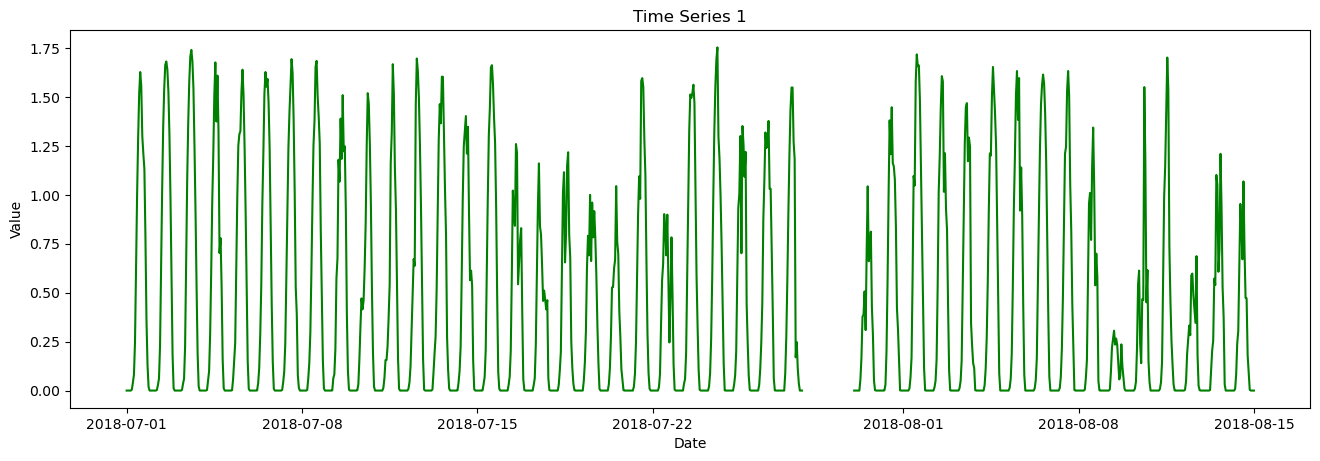

In [32]:
plot_series(series1, x=series1.index, y=series1.value, title='Time Series 1', color='green')

##### Second series has an unusual behaviour, with several years of data missing. This kind of behaviour could be related to historical data of natural disasters, accidents, medical conditions, or appearances of syndromes or infections in a medical industry. 

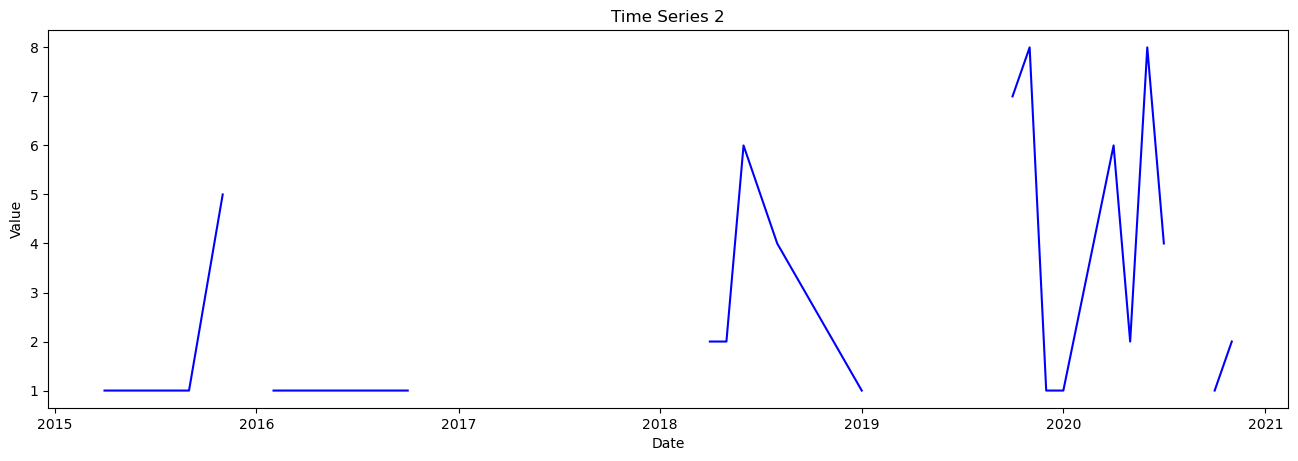

In [33]:
plot_series(series2, x=series2.index, y=series2.value, title='Time Series 2', color='blue')

#### Both series have missing values. How would you interpret and impute these missing values? Why?

##### Depending on the origin of data you can choose between different approaches to fill null values. For an easy and quick approach you can use Forward Filling, or even go to a complex solution like Backward Filling, Linear Interpolation, Mean od nearest neighbors, etc.

##### The next example uses forward filling to plot both series again

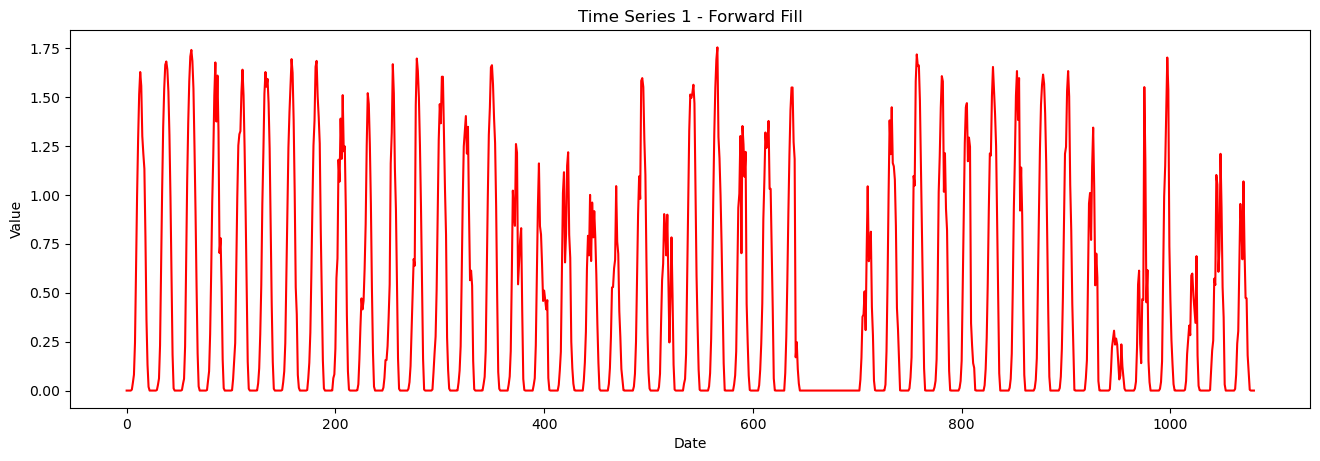

In [35]:
series1_ff = series1.ffill()
plot_series(series1_ff, x=series1_ff.index, y=series1_ff.value, title='Time Series 1 - Forward Fill', color='red')

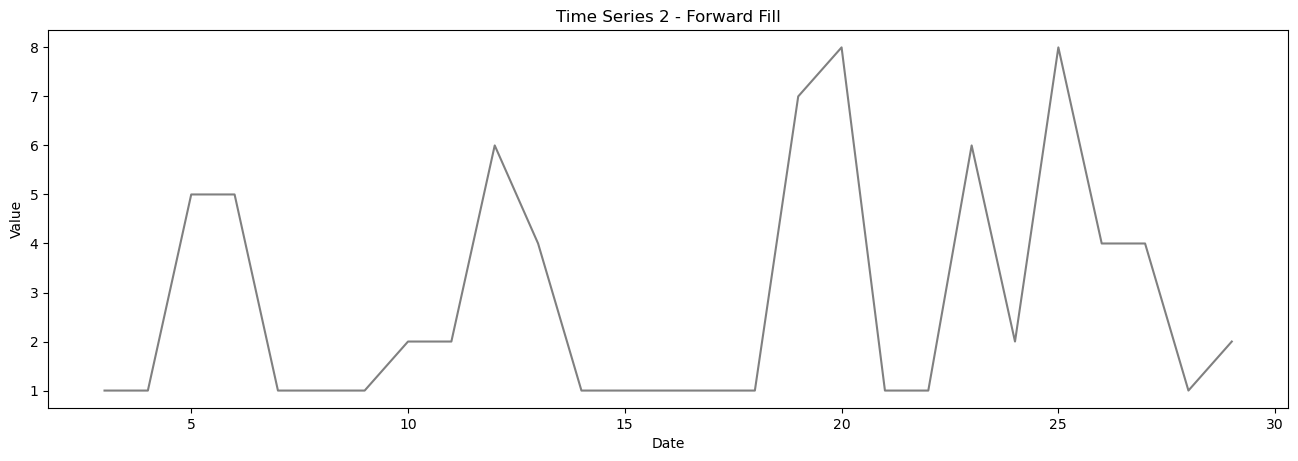

In [36]:
series2_ff = series2.ffill()
plot_series(series2_ff, x=series2_ff.index, y=series2_ff.value, title='Time Series 2 - Forward Fill', color='gray')